In [1]:
import pandas as pd
import os

In [2]:
files = [file for file in os.listdir('./Sales_Data')]

all_months_data=pd.DataFrame()
for file in files:
    df=pd.read_csv(f'./Sales_Data/{file}')
    all_months_data = pd.concat([all_months_data,df])
all_months_data.to_csv('all_data2.csv', index=False)

In [3]:
all_data = pd.read_csv('all_data2.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


# Clean Data

## find NaN values and drop

In [4]:
all_data=all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


## Find Strings in rows

In [5]:
temp_df = all_data[all_data['Order Date'].str[0:2]=='Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1172,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1620,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1726,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1891,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [6]:
# discard the rows w/ string
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


## Convert to the correct dtype

In [7]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


## Create columns

### Sales column

In [8]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11.99
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",23.90
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",150.00
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",149.99
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",99.99


### Month column

In [9]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Order Date'].str[0:2].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11.99,11
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",23.90,11
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",150.00,11
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",149.99,11
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",99.99,11


### City column

In [44]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour,Minute
0,278797,Wired Headphones,1,11.99,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001",11.99,11,New York City (NY),9,54
1,278798,USB-C Charging Cable,2,11.95,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301",23.90,11,Austin (TX),10,3
2,278799,Apple Airpods Headphones,1,150.00,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001",150.00,11,Los Angeles (CA),14,56
3,278800,27in FHD Monitor,1,149.99,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101",149.99,11,Seattle (WA),22,24
4,278801,Bose SoundSport Headphones,1,99.99,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215",99.99,11,Boston (MA),13,56


## Find the month w/ most Sales

In [11]:
results = all_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


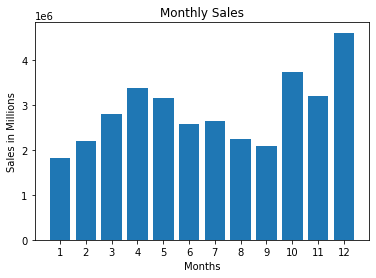

In [12]:
import matplotlib.pyplot as plt
import numpy as np
months = np.arange(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.title('Monthly Sales')
plt.ylabel('Sales in Millions')
plt.xlabel('Months')
plt.show()

In [13]:
# December obviously had the most sales, probably because of Christmas, we had to check what
# happened on April, sales seem a little higher.
all_data.to_csv('first_plot.csv')

## which City had the most Sales

In [14]:
cities = all_data.groupby('City').sum()
cities

,Quantity Ordered,Price Each,Sales,Month
City,,,,
Atlanta (GA),16602,2.779908e+06,2.795499e+06,104794
Austin (TX),11153,1.809874e+06,1.819582e+06,69829
Boston (MA),22528,3.637410e+06,3.661642e+06,141112
Dallas (TX),16730,2.752628e+06,2.767975e+06,104620
Los Angeles (CA),33289,5.421435e+06,5.452571e+06,208325
New York City (NY),27932,4.635371e+06,4.664317e+06,175741
Portland (ME),2750,4.471893e+05,4.497583e+05,17144
Portland (OR),11303,1.860558e+06,1.870732e+06,70621
San Francisco (CA),50239,8.211462e+06,8.262204e+06,315520


## Plot

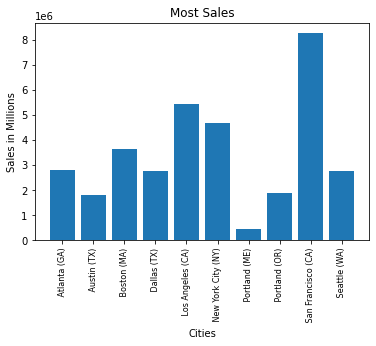

In [15]:
cities_order =[city for city, df in all_data.groupby('City')]

plt.bar(cities_order, cities['Sales'])

plt.xticks(cities_order, rotation='vertical', size=8)

plt.title('Most Sales')
plt.ylabel('Sales in Millions')
plt.xlabel('Cities')
plt.show()
# San Francisco was the city w/ most sales we should probably look into it.
# what are we doing wright there
# We definitely need to look into Portland, it looks bad, we should probably Close there.

## At what time we should display ads?

### Convert Order Date to DateTime.

In [16]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [18]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,278797,Wired Headphones,1,11.99,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001",11.99,11,New York City (NY)
1,278798,USB-C Charging Cable,2,11.95,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301",23.90,11,Austin (TX)
2,278799,Apple Airpods Headphones,1,150.00,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001",150.00,11,Los Angeles (CA)
3,278800,27in FHD Monitor,1,149.99,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101",149.99,11,Seattle (WA)
4,278801,Bose SoundSport Headphones,1,99.99,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215",99.99,11,Boston (MA)


### Create hour column

In [19]:
all_data['Hour']=all_data['Order Date'].dt.hour
all_data['Minute']=all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour,Minute
0,278797,Wired Headphones,1,11.99,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001",11.99,11,New York City (NY),9,54
1,278798,USB-C Charging Cable,2,11.95,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301",23.90,11,Austin (TX),10,3
2,278799,Apple Airpods Headphones,1,150.00,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001",150.00,11,Los Angeles (CA),14,56
3,278800,27in FHD Monitor,1,149.99,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101",149.99,11,Seattle (WA),22,24
4,278801,Bose SoundSport Headphones,1,99.99,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215",99.99,11,Boston (MA),13,56


In [20]:
all_data.to_csv('hour_minute.csv')

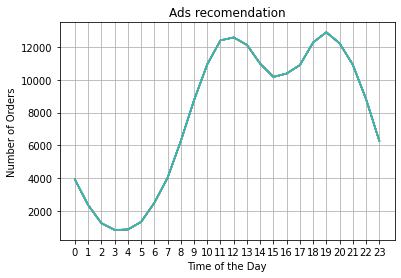

In [21]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()

plt.title('Ads recomendation')
plt.xlabel('Time of the Day')
plt.ylabel('Number of Orders')
plt.show()
# we should run ads at around 10 to 10:30am and/or 06pm, a little before the times 
#when we have the most traffic 

## At which time we should run ads on portland to increase sales

## what products are sold toghether more often 

In [58]:
# check for same order id's
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour,Minute
9,278806,Bose SoundSport Headphones,1,99.99,2019-11-19 19:12:00,"174 2nd St, Boston, MA 02215",99.99,11,Boston (MA),19,12
10,278806,ThinkPad Laptop,1,999.99,2019-11-19 19:12:00,"174 2nd St, Boston, MA 02215",999.99,11,Boston (MA),19,12
15,278811,Wired Headphones,1,11.99,2019-11-06 16:01:00,"99 Elm St, San Francisco, CA 94016",11.99,11,San Francisco (CA),16,1
16,278811,Apple Airpods Headphones,1,150.00,2019-11-06 16:01:00,"99 Elm St, San Francisco, CA 94016",150.00,11,San Francisco (CA),16,1
24,278819,iPhone,1,700.00,2019-11-04 06:20:00,"880 Maple St, New York City, NY 10001",700.00,11,New York City (NY),6,20
25,278819,Apple Airpods Headphones,1,150.00,2019-11-04 06:20:00,"880 Maple St, New York City, NY 10001",150.00,11,New York City (NY),6,20
39,278833,iPhone,1,700.00,2019-11-04 10:34:00,"700 Pine St, San Francisco, CA 94016",700.00,11,San Francisco (CA),10,34
40,278833,Lightning Charging Cable,2,14.95,2019-11-04 10:34:00,"700 Pine St, San Francisco, CA 94016",29.90,11,San Francisco (CA),10,34
47,278840,Bose SoundSport Headphones,1,99.99,2019-11-23 20:46:00,"490 Walnut St, Los Angeles, CA 90001",99.99,11,Los Angeles (CA),20,46
48,278840,27in FHD Monitor,1,149.99,2019-11-23 20:46:00,"490 Walnut St, Los Angeles, CA 90001",149.99,11,Los Angeles (CA),20,46


### join products w/ the same order id

In [60]:

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

<ipython-input-60-ef83edd6e4b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
9,278806,"Bose SoundSport Headphones,ThinkPad Laptop"
15,278811,"Wired Headphones,Apple Airpods Headphones"
24,278819,"iPhone,Apple Airpods Headphones"
39,278833,"iPhone,Lightning Charging Cable"
47,278840,"Bose SoundSport Headphones,27in FHD Monitor"


In [65]:
from itertools import combinations
from collections import Counter
count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
#     2 product most commonly bought together
    count.update(Counter(combinations(row_list,2)))
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [63]:
df.to_csv('most_common.csv')

## what product sold the most

In [73]:
dfp = all_data.groupby('Product').sum()
dfp

,Quantity Ordered,Price Each,Sales,Month,Hour,Minute
Product,,,,,,
20in Monitor,4129,451068.99,454148.71,29336,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,2435097.56,44440,90916,184331
27in FHD Monitor,7550,1125974.93,1132424.50,52558,107540,219948
34in Ultrawide Monitor,6199,2348718.19,2355558.01,43304,89076,183480
AA Batteries (4-pack),27635,79015.68,106118.40,145558,298342,609039
AAA Batteries (4-pack),31017,61716.59,92740.83,146370,297332,612113
Apple Airpods Headphones,15661,2332350.00,2349150.00,109477,223304,455570
Bose SoundSport Headphones,13457,1332366.75,1345565.43,94113,192445,392603
Flatscreen TV,4819,1440000.00,1445700.00,34224,68815,142789


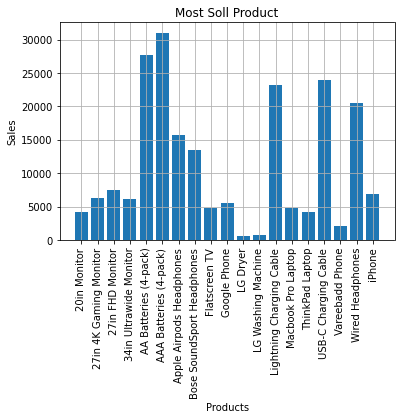

In [78]:
product_order =[product for product, df in all_data.groupby('Product')]

plt.bar(product_order, dfp['Quantity Ordered'])

plt.xticks(product_order, rotation='vertical', size=10)

plt.title('Most Soll Product')
plt.ylabel('Sales')
plt.xlabel('Products')
plt.grid()
plt.show()
# AAA Batteries (4-pack) was the product we sold the most, probably because a lot of people
# need it for their TV remotes or any controller.
# we probably can increase the sales of charging cables by promoting them a little more

In [77]:
dfp.to_csv('most_soll_product.csv')

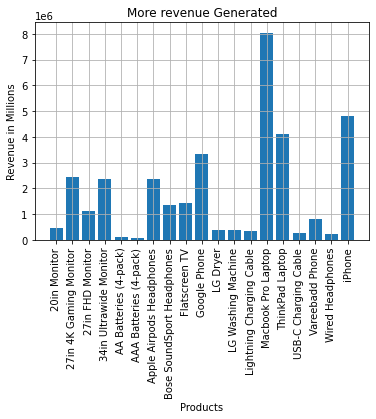

In [82]:
product_order =[product for product, df in all_data.groupby('Product')]

plt.bar(product_order, dfp['Sales'])

plt.xticks(product_order, rotation='vertical', size=10)

plt.title('More revenue Generated')
plt.ylabel('Revenue in Millions')
plt.xlabel('Products')
plt.grid()
plt.show()
# The mac-book pro generated the most revenue
# we can probably increase the sales of other laptop that we offer like the ThinkPad 

In [85]:
prices = all_data.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

## overlay data on a plot

<ipython-input-98-19a5bb4bb405>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product_order, rotation='vertical',size=10)


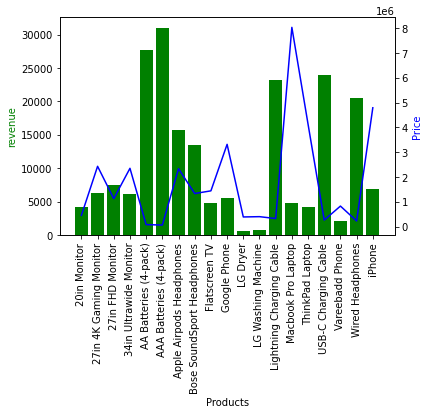

In [98]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(product_order, dfp['Quantity Ordered'], color='g')
ax2.plot(product_order, dfp['Price Each'], 'b-')

ax1.set_xlabel('Products')
ax1.set_ylabel('revenue', color='g')
ax2.set_ylabel('Price', color='b')
ax1.set_xticklabels(product_order, rotation='vertical',size=10)
plt.show()